# Assignment 11 - Load Models #

In [8]:
import os
import sys
# //*** Imports and Load Data
#import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd


from pathlib import Path


#//*** Use the whole window in the IPYNB editor
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', None)

import email
from email.policy import default
from email.parser import Parser

   

from chardet.universaldetector import UniversalDetector
from bs4 import BeautifulSoup
    
#//*** Quiet the BS4 warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

import keras
import tensorflow as tf


import pickle



In [57]:
#//********************************************************
#//*** Plot a Fitted Models History of Loss and Accuracy
#//********************************************************
def plot_model_history(input_history):
    import matplotlib.pyplot as plt
    

    loss_key, acc_key = list(input_history['history'].keys())[:2]
    

    acc = input_history['history'][acc_key]
    loss = input_history['history'][loss_key]

    
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, acc, "b", label="Training Accuracy")
    plt.title("Training Accuracy\nAccuracy should go up")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, "bo", label="Training Loss")
    
    plt.title("Training Loss \nLoss should go down")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    #//*** Quit if only accuracy and Loss
    if len(list(input_history['history'].keys())) == 2:
        return
    

    val_loss_key, val_acc_key = list(input_history.history.keys())[2:]
    
    val_loss = input_history.history[val_loss_key]
    val_acc = input_history.history[val_acc_key]

    plt.plot(epochs, loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    #//*** Plot the Validation Set Accuracy
    plt.clf()
    
    plt.plot(epochs, acc, "bo", label="Training accuracy")
    plt.plot(epochs, val_acc, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    
    

In [64]:


#//*** Get Working Directory
current_dir = Path(os.getcwd()).absolute()

results_dir = current_dir.joinpath("results")

models = []

#//*** Load Models and supporting parameters from disk
for filename in os.listdir(results_dir):
    if ".h5" in filename:
        
        base_filename = filename.replace(".h5","")
        
        print(base_filename)
        
        #//*** Load the Pickle Files (Dictionaries, History, Parameters)
        with open(f"{results_dir.joinpath(base_filename)}.pkl",'rb') as f:
            loop_obj = pickle.load(f)
            
        if 'Letters' in base_filename:
            loop_obj['type'] = 'letter'
        
        if 'Words' in base_filename:
            loop_obj['type'] = 'word'

        #//*** Load the model into the loop_objhect dictionary
        loop_obj['model'] = keras.models.load_model(f"{results_dir.joinpath(base_filename)}.h5")
        
        loop_obj['filename'] = base_filename
        
        #//*** Add Model to the list
        models.append(loop_obj)
        


#//*** USe the opening stanza of The Raven as a writing prompt.
seed_text = "Once upon a midnight dreary, while I pondered, weak and weary,Over many a quaint and curious volume of forgotten lore— While I nodded, nearly napping, suddenly there came a tapping, As of some one gently rapping, rapping at my chamber door— 'Tis some visitor, I muttered, tapping at my chamber door— Only this and nothing more."



1_model_EdgarAllenPoe_Letters_PCT10.0_ML60_S20_TC128
2_model_EdgarAllenPoe_Letters_PCT10.0_ML30_S10_TC256
3_model_EdgarAllenPoe_Letters_PCT50.0_ML60_S20_TC256
4_model_EdgarAllenPoe_Letters_PCT100_ML60_S6_TC256
5_model_EdgarAllenPoe_Words_T10000_PS10_S3_(2493812)


# Display Models, Parameters and Sample Predictions #

dict_keys(['chars', 'char_indices', 'history', 'params', 'predictions', 'type', 'model', 'filename'])
Model Parameters
max_len: 60
pct: 0.1
step: 20
tensor_count: 128
letter Based
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 128)               115200    
_________________________________________________________________
dense_36 (Dense)             (None, 96)                12384     
Total params: 127,584
Trainable params: 127,584
Non-trainable params: 0
_________________________________________________________________
None


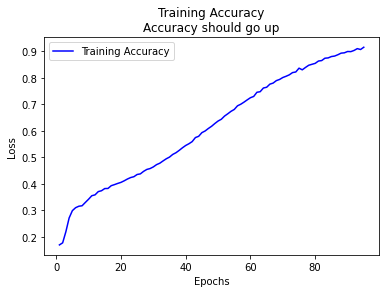

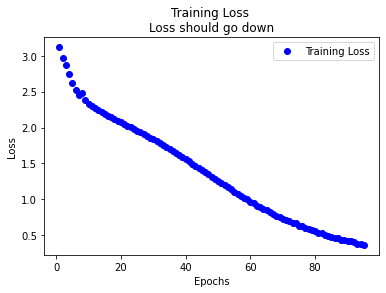


Sampled Training Predictions:
[  parallel of southern latitude, it turned off suddenly, at a ]ne the the the the the the the the the the the the the the the the the the the the the the the the the the the the the t
[  parallel of southern latitude, it turned off suddenly, at a ]nd and and and and and and and and and and and and and and and and and and and and and and and and and and and and and a
[  parallel of southern latitude, it turned off suddenly, at a ]nd and and and and and and and and and and and and and and and and and and and and and and and and and and and and and a
[  parallel of southern latitude, it turned off suddenly, at a ]nd the the the the the the the the the the the the the the the the the the the the the the the the the the the the the t
[  parallel of southern latitude, it turned off suddenly, at a ]nd and and and and and and and and and and and and and and and and and and and and and and and and and and and and and a
[  parallel of southern latitude, it turned 

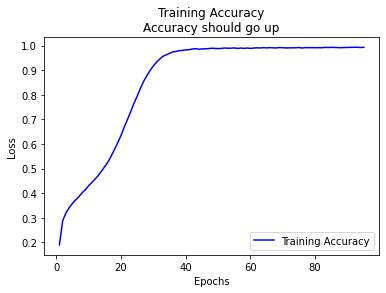


Sampled Training Predictions:
[  the percer and the percer and ]he here the here the here the here the here the here the here the here the here the here the here the here the here the 
[ he here the here the here the  ]his the pare the pare the serer of the pore the serer of the pore the serer of the pore the serer of the pore the serer 
[ e serer of the pore the serer  ]hith the bear and the pare of the pore. It is of the poreand to the pearre of the pearen of the pearen of the pearen of 
[ f the pearen of the pearen of  ]is hight mant appinetion of the excenser and the mallor and decelly of the houthens. In the reate of the pare, which the
[ e reate of the pare, which the ]is sicten, a andiniting bus with to mast it the poorth spof sithee compand nowisable that the hade of this of the orensa
[ the hade of this of the orensa ]is ligtt mplente, and to bestou macharla lighor, and the every of a sare of the soul ware of the moone. It eper ta beans
[ of the moone. It eper ta beans ]ith a

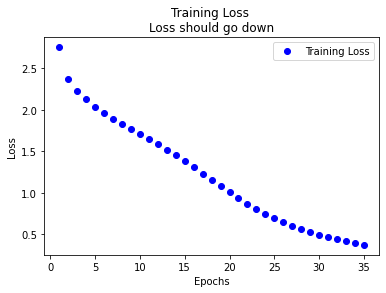


Sampled Training Predictions:
[ d the blather my sible to the latter in the eart. It was as  ] and the sound the sound the sound the sound the sound the sound the sound the sound the sound the sound the sound the s
[ ound the sound the sound the sound the sound the sound the s ] be to the some of the contine of the some of the contine of the some of the contine of the some of the contine of the s
[  the some of the contine of the some of the contine of the s ]d the disting of the contrines of the seames with with the reat of the seat with with the reat of the contined of the se
[ eat of the seat with with the reat of the contined of the se ]d, in the dinstent, he passived the cranter pearress of the charr, and the sterning and some not a chulfer and dacaries 
[ charr, and the sterning and some not a chulfer and dacaries  ]d. The supperers, whine in in a consing abreith in curition, which the assess that of menicain collusion that the eartic
[  which the assess that of menicain collusi

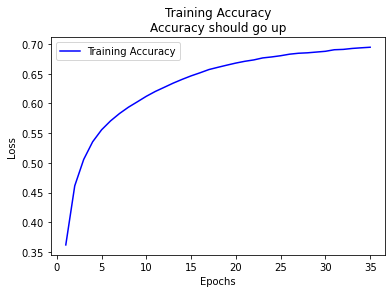


Sampled Training Predictions:
[ Once upon a midnight dreary, while I pondered, weak and wear ]th the strange of the strange of the strange of the strange of the strange of the strange of the strange of the strange 
[ Once upon a midnight dreary, while I pondered, weak and wear ]s of the seven of the bottom of the seas of the seven of the bottom of the seas of the bottom of the seas of the seven o
[ Once upon a midnight dreary, while I pondered, weak and wear ]s the personal ruby of the board and the thing, and the personal region of the constractic and the state of the manner o
[ Once upon a midnight dreary, while I pondered, weak and wear ]s she said that I had been suppered the point of the surface of the cornsparatical and the sounds. I had not been attemp
[ Once upon a midnight dreary, while I pondered, weak and wear ]s succeeded in the same time, the most intentions of the true, and the conscious of the corpse, the contiment of the thi
[ Once upon a midnight dreary, while I ponde

In [65]:
print(models[0].keys())

for model_params in models:
    print("=================")
    print("Model Parameters")
    print("=================")
    for key,value in model_params['params'].items():
        print(f"{key}: {value}")
    print(model_params['type'], "Based")
    print("======")
    print(model_params['model'].summary())
    try:
        plot_model_history(model_params['history'])
    except:
        print("No Saved History")
    print()
    print("Sampled Training Predictions:")
    try:
        for pred in model_params['predictions']:
            print(pred[1])
    except:
        print("No Saved Predictions")
        
    print("============================")
    print("============================")
    print("============================")
    print("============================")


##  Fixed seed text. Generate text based on these strings. The first handful are quotes from Edgar Allen Poe poems. The first is a duplicate. The modeled text should be identical for both values before using the sampled function.  ##

In [136]:

seeds = [
    'Believe only half of what you see and nothing that you hear.',
    'Believe only half of what you see and nothing that you hear.',
    'The scariest monsters are the ones that lurk within our souls.',
    'I became insane, with long intervals of horrible sanity.',
    'The believer is happy. The doubter is wise.',
    'There is no beauty without some strangeness',
    'Biden warns Putin of swift and severe costs if Russia invades Ukraine in hour-long call',
    'Sunnyvale resident starts sweet scavenger hunt, 100 Valentines Day hearts on display across city',
    'The Cavernous Chittering Masses churn with glee and delight as Monmoth is Nevermore',
    'The Oracles constant obliqueness lead to his foul and fecudent mood. To Bathe in her blood whilst nibbling upon their meat seemed most satisfying',
    'The best laid plans of Mice and Men go oft awry and ',
    'Feculent suffering is best left for the masses while '    
]


## Model Predictions: No randomized Sampling ##

In [138]:
print("===========================================================================")
print("===========================================================================")
print("===========================================================================")
print("Model Predictions")
print("===========================================================================")
print("===========================================================================")
for whole_model in models:
    try:
        #//**** One of the earlier models has a params issue....skip it
        maxlen = whole_model['params']['max_len']
    except:
        continue
    chars = whole_model['chars']
    char_indices = whole_model['char_indices']
    model = whole_model['model']

    print("===========================================================================")
    print("Model Parameters:")
    print(f"{whole_model['params']['pct']*100}% of source content modeled")
    print(f"Sample Length: {maxlen}, Sample Interval: {whole_model['params']['step']} Characters,Tensor Count: {whole_model['params']['tensor_count']}.")

    print("===========================================================================")
    for sentence in seeds:

        #//****************************************************************************************
        #//*** Pad each seed to maxlen. Prompts less than maxlen will be padded with " "{spaces}.
        #//***          Prompts greater than maxlen will be truncated
        #//****************************************************************************************
        generated_text = [' '] * maxlen
        for i,letter in enumerate(sentence):
            if i == maxlen:
                break
            generated_text[i] = letter

        #//*** Convert Seed text back to string
        generated_text = "".join(generated_text)

        #//*** Initialize predictions with Seed Text
        predict = f"{generated_text}: "

        # We generate 400 characters
        for i in range(400):
            
            #//*** Empty one hot encoded array
            sampled = np.zeros((1, maxlen, len(chars)))
            
            #//*** One Hot Encode Generated Text
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            #//*** Predict the Next Character 
            preds = model.predict(sampled, verbose=0)[0]

            next_char = chars[np.argmax(preds)]

            predict += next_char

            generated_text += next_char
            generated_text = generated_text[1:]

            #sys.stdout.write(next_char)
            #sys.stdout.flush()
        print(predict,"\n\n")
    

Model Predictions
Model Parameters:
10.0% of source content modeled
Sample Length: 60, Sample Interval: 20 Characters,Tensor Count: 128.
Believe only half of what you see and nothing that you hear.:  The undent lllwore meng ngeininy in the hise the the the ppopphionssufte seentutseesse of the expentwor asse of the eat. Ih dad at wor the prothhred, on the ubrent to mese of the coontarur, and the the phrreced, a tall allagell meat the phision of the abret the matting the is sseese the kengrly bythere ss oome of the woorthe with mustable the mabuaring of fhic sestallate of me fient of the acass. 


Believe only half of what you see and nothing that you hear.:  The undent lllwore meng ngeininy in the hise the the the ppopphionssufte seentutseesse of the expentwor asse of the eat. Ih dad at wor the prothhred, on the ubrent to mese of the coontarur, and the the phrreced, a tall allagell meat the phision of the abret the matting the is sseese the kengrly bythere ss oome of the woorthe with mu

The believer is happy. The dou: nt of tis pppeartions sot ear hive beidibe habe sexe be bellow that com. This shat is the pore. I was reaslived that his lactherd suct a pouth, and gevery here is free seat of the plesst I whuch eare so therm yofeented fov the peare, of ge or, fould I ceated to se for the par, and seffecce, to a chimm bour meanillly is vertense sofe mumula haddded to me reare ne whe comes of a loft hime been abbec 


There is no beauty without som:  the biele of the sartessed a dow from I had now sare a buwind cammanited. It is peesent to eaver hat hith eartally ffrimed, for the poor fof him continulicity don and dustally five the beher, the tegen wort haver me sould af inteest timens or ans loon beck a most wirkiss ffrer that a douth ranille por’scousss and that I aad of insifure to the visuss for the plesenting of atination the machure of  


Biden warns Putin of swift and: arnand, the unteath was toutworve do deinally. The evenet of spof the eard, and the seffer mand,

The best laid plans of Mice and Men go oft awry and         : insippined, and was and and had at it in a greatly some pon for a drawarn remorminis. It see hid we see a wast of forts the eartation comparentle from their imbridation lefe that not bett a liggled, and lead, and of the boat, which reading in cintumen of light to thore that may at my lenght excectingly peased. At ling land than offees and lange was so emored the highing was resuinlly and into a ke 


Feculent suffering is best left for the masses while        : nnt passssterd broked as to some shall oncy a phengher, and he precemed to be a strongly mide the seem tig the deck as un allesself un a feentrousted confertanned by the carail alatting in cimbor the hold bout the eart menthre contunation. It save love mich a manged the intigal pricapions and foom to tome was all a songe was all into bear looged, and had been ore of the earth the excemster of the  


Model Parameters:
100% of source content modeled
Sample Length: 60, 

## Model Predictions: Straight Predictions vs Randomized Sampling ##

In [139]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

prediction_count = 400

print("===========================================================================")
print("===========================================================================")
print("===========================================================================")
print("Model Predictions using with additional randomization")
print("===========================================================================")
print("===========================================================================")
for whole_model in models:
    try:
        #//**** One of the earlier models has a params issue....skip it
        maxlen = whole_model['params']['max_len']
    except:
        continue
    chars = whole_model['chars']
    char_indices = whole_model['char_indices']
    model = whole_model['model']

    print("===========================================================================")
    print("Model Parameters:")
    print(f"{whole_model['params']['pct']*100}% of source content modeled")
    print(f"Sample Length: {maxlen}, Sample Interval: {whole_model['params']['step']} Characters,Tensor Count: {whole_model['params']['tensor_count']}.")

    print("===========================================================================")
    for sentence in seeds:

        #//****************************************************************************************
        #//*** Pad each seed to maxlen. Prompts less than maxlen will be padded with " "{spaces}.
        #//***          Prompts greater than maxlen will be truncated
        #//****************************************************************************************
        generated_text = [' '] * maxlen
        for i,letter in enumerate(sentence):
            if i == maxlen:
                break
            generated_text[i] = letter

        #//*** Convert Seed text back to string
        generated_text = "".join(generated_text)

        #//*** Initialize predictions with Seed Text
        predict = f"[{generated_text}]"

        # We generate 400 characters
        for i in range(prediction_count):
            
            #//*** Empty one hot encoded array
            sampled = np.zeros((1, maxlen, len(chars)))
            
            #//*** One Hot Encode Generated Text
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            #//*** Predict the Next Character 
            preds = model.predict(sampled, verbose=0)[0]

            next_char = chars[np.argmax(preds)]

            predict += next_char

            generated_text += next_char
            generated_text = generated_text[1:]
        
        print("Prediction No Randomization: ",predict,"\n\n")
            

        for temperature in [0.2, 0.5, 1.0, 1.2]:
            #//*** Initialize predictions with Seed Text
            #generated_text = base_text
            predict = f"[{generated_text}]"     

            
            # We generate 400 characters
            for i in range(prediction_count):


            
                #//*** Empty one hot encoded array
                sampled = np.zeros((1, maxlen, len(chars)))

                #//*** One Hot Encode Generated Text
                for t, char in enumerate(generated_text):
                    sampled[0, t, char_indices[char]] = 1.

                #//*** Predict the Next Character 
                preds = model.predict(sampled, verbose=0)[0]

                next_char = sample(preds, temperature)

                #print("next Char: ", next_char)
                #next_char = vectorizer.vocabulary_ngrams[next_index]

                next_char = chars[np.argmax(preds)]

                predict += next_char

                generated_text += next_char
                generated_text = generated_text[1:]

                #sys.stdout.write(next_char)
                #sys.stdout.flush()
            print("----- temperature: ", temperature,predict)
        print("\n=============================================\n")
        

Model Predictions using with additional randomization
Model Parameters:
10.0% of source content modeled
Sample Length: 60, Sample Interval: 20 Characters,Tensor Count: 128.
Prediction No Randomization:  [Believe only half of what you see and nothing that you hear.] The undent lllwore meng ngeininy in the hise the the the ppopphionssufte seentutseesse of the expentwor asse of the eat. Ih dad at wor the prothhred, on the ubrent to mese of the coontarur, and the the phrreced, a tall allagell meat the phision of the abret the matting the is sseese the kengrly bythere ss oome of the woorthe with mustable the mabuaring of fhic sestallate of me fient of the acass. 


----- temperature:  0.2 [e the mabuaring of fhic sestallate of me fient of the acass.] I hodedent tle coussr in soffere the atrions, a drang the flige and and reancer ant anurale, comnons, and foftthisy em anter antercons, and the forrt as bies of andartitles wit the sass.
The dsastte the camurithe pingtr anding the heme theabion

----- temperature:  0.2 [ss. Ied bout dintill the the expering. The lore, to seess di]gt a dagr bithe is frecemant of fue touss whe chasubien sfonn.
Ther in licl darcor a diginin sipilidigilis bieing by the the subyee of the subtion of an sulled, bet of the ponthrre. Thet in the edeentedy continusussee cocemoonsseerpem, and whe hhis was of coms.
Werens s ppranure to the easte labken the had and no the seviren andente componding by the extemont. In ad whic  of thous what har andeatt
----- temperature:  0.5 [nding by the extemont. In ad whic  of thous what har andeatt]recomed the earabien of the sabitar of mestinter of the cous.
The mant and the eareey of the pant nf the mart rerrin the furght,,es and foll whull his limage I llle sereen the pinine of the earth the unthin d forcly, hit a a bed the preored and the ino so conss for the ination, of the eas of the soont rertens the pepparition so peroom.
“ooon to lo the hat buthe shighs f tle candiy on and for ine i
----- temperature:  1.0 [o

----- temperature:  1.0 [e table of the and and wow hos maderlly here tte poparions i]nt the sounthrr meigin susppathon whe mere in the conk, woul so bes follle rett the tay, and for mereat of the anding rewis se canfinn; the sided fof the it the eastented of the eastrer wowl his onssule de conninurus he war, bytus myou aneen the emupasion of the subttur of the eathinc. The dad fof pircumett, wit wo less with comn, anded, thentous the forther, and no ther moow his ness on aullar me
----- temperature:  1.2 [thentous the forther, and no ther moow his ness on aullar me]sente souches ect of the eamant of the southror ot ee bett hamund to eesse the pasing of the subert of the forthithit is me teeect the chantandong fofit tis se thathe of the eation of the abrirut. I dad whice seeve to elemertetome of the umportith ess bythem and reant of the soustrressed, in the enour sppeconssound do bess of the cont. The sake nowe redstite eased be foret all the anting on the sa


Prediction No Randomizat

Prediction No Randomization:  [The best laid plans of Mice and Men go oft awry and         ]hiz mo add beth him noud, the moon and the ere omentllleede fot the howthe the thantury whe memabibus, and whith speees with appeale to mengron, on undens of the posss. Inot, and the esseve, of to ees of alles commananally in the earprestite of the subion of the abrer the mantaring.
“Bitttit ceccessed in the prepoor his bert bert my arricest the cantanariby. The thiy the ear onserrer cementaty on  


----- temperature:  0.2 [est the cantanariby. The thiy the ear onserrer cementaty on ]aturest the chapphasented of the urthre whit me andente the munthing foftitisiestiess tithe componther oof foct uttatt whithe suatting whith the butht heat and to tess of alr httrecelly le, ant on he porstiof the marin of the southor of the earlation of the contion of the sadibus of the sathing of the subter of rement. Inoun, and the ofersertion, and foretherppprrow thon my tha boon of the softina
----- temperature

----- temperature:  0.5 [ggte, and thir my ams and sofe]e for an acd astance. for the hoon wouth liver vempom as it the myeefariully for a sight of assing the excees warable disst, and as far spay that him no it of the promen which eart of the horrhanter compontationg.
Thet be he been parplaced in reisen in the mare. I has really that time the matter with the parchured of the fichemsting which I hade sewe priced in my firchinat tibse spouth bet. enow s
----- temperature:  1.0 [hinat tibse spouth bet. enow s]parce you s if fim midticuent noing stouth bith the haiberect at antert ersppess of rethent timestor, and hidhixccmest anravel compostanled. The warte spupts wade depprrfive hith as figt. eec, ho nonde sow soult if griath, stice fffect it uppest tsessers far outhtre sheeiig upar deen ..
The, be berteated and genten in oy the prrasenswor and fill ammeed fof his spidining uid the parcenstw of duscin
----- temperature:  1.2 [ng uid the parcenstw of duscin]iling be dessev; but be chene,

Prediction No Randomization:  [There is no beauty without som] the biele of the sartessed a dow from I had now sare a buwind cammanited. It is peesent to eaver hat hith eartally ffrimed, for the poor fof him continulicity don and dustally five the beher, the tegen wort haver me sould af inteest timens or ans loon beck a most wirkiss ffrer that a douth ranille por’scousss and that I aad of insifure to the visuss for the plesenting of atination the machure of  


----- temperature:  0.2 [g of atination the machure of ]ascerfatuI acticition whe hive byssebee the be, wore of all thr gole. I has leatluved that the whight be fourt of the congher to geser, fool meands and deenfey yoceedion the cancemeat of the excease ittrepphar wither calle, and the exceaminity of acuserving the allar reurd. The danully pperetet inss spertengent of reaninisg bet antiretlaning continule to tcumoution at the tray at outherd notupreri
----- temperature:  0.5 [ the tray at outherd notupreri]pppore oudued, int mi

----- temperature:  1.0 [r the gabse war could not a ll]los of any his fagtlor hever to bese fouth atresporeing meme the raiberuphas deerore.
“,he bein bupe I and doken and nomuse I ceneeeed to mechined beto a digt. in im niteititlle, is spenee, in treand, in treerif in to paible spon the exce.s, whil seecce, in the crigress cond atolly it mest howe there to ercear upla atworct erouss and densension and respared intaring the hala beid of the sever; out
----- temperature:  1.2 [he hala beid of the sever; out] of ffisting I caverety toussess the ring of the sablesh it the firct of the sable butt eact and acteating cameare deesseffer it or wellomeme, in the from of styet, wore senderded, the in lagh me fours hod gented to youe to the carbelle the dessens, of could the elle mesible of the farsh with eachinat of the thinatt ond at the beaver intasted, woth s ent at ang aibe-. The reaser touss of the moon,


Prediction No Randomization:  [The Oracles constant obliquene]t in the prishers comm

Prediction No Randomization:  [Believe only half of what you see and nothing that you hear.] I had to so ville to be even the sonter, and at leash the boate of the beath prevery with precentions and the shouthers. The matt suck of their sime the decess, and we wish be a complesedible that he saided to be a some discession, a paintily, and the sape are be a fecale tim flan for matula imation. The uping of sighes of the vaile chilf then the upon itt card to the colles were forming the ores 


----- temperature:  0.2 [f then the upon itt card to the colles were forming the ores] passilly carmen betore and enten the lage of the ventless. ond the lave was of a corpas of my hase reased at the hade of the invensine, which readers the notring of a daster compided the asis of the late which is wolld and my sone of the bost of the been recelted in the bain them intoxtred of the awal with it minutusation of sone retorn and purposs it will resure tow accoude even s could no rase 
----- temperature

----- temperature:  0.5 [ a comple evengas, and that he was of the look of somessivig]ably blieven, but al amparied, that he was a laggle his dispopired. .low wher I came a chance of the hore remore of the attenth the light wand of and and feet in the eagh noture of sould be theme, and that the will wish betorn and as fearth, untoully me it in a songlope, ald althore defficulty in spocch, which the artermon scruther by the carait of the readly at lash, and off to too seall that, he
----- temperature:  1.0 [ carait of the readly at lash, and off to too seall that, he] was not more herrilly the note lear. It as it will his becond, as we are of the night, and of the bore, of the matter witt in excention of the askspletity. of the terpprest, and from the excemsion of the conventance. I mad we a thong the bout thome observation in the reak which which considenated the late lastion of contrivently and fane him diftinused. dit is bo the bringther of a yow deamint no
----- temperature:  1.2 [ 

----- temperature:  1.2 [assembed the late lift excedination. It sat the gas of a lat]e the bade neal his fill. I the weat reamer it well as the hape of the beath of lood me the red merall as to been enten, of anailing the earr of mise lensulations of becepsion, and that a sight sached tomence. The rull was no long at the boarde stronging oo the consiniagl peraining thut. It was excelsed by the earth presome of all which I cauld to lepped ty the harter straged in the latter have be


Prediction No Randomization:  [Sunnyvale resident starts sweet scavenger hunt, 100 Valentin]g and lown a ound of this excepsion, and the armess at ling and rowhing again, whing consined to aw and his been a sublled companion, as there shattly that his idseenst of the vinity of the some any gresting which the attend of the veen which was upon diffees the dide undiling interlapiont be and a bling difficulty, in the bain thompenes of the carment, in fifthes of proportion reasons it was all  


----- temperatu

----- temperature:  0.2 [ lange was so emored the highing was resuinlly and into a ke]en of bedand my soits afo remate in allowity into becasces, and be a fitere time of my fartheres me in a greater apon the enre in the dain throught of the eliter and daloon as that of my diffice the cauned bet of the convensing astully. I thould and leet hang of wele bening romaining upon my sole; and the shout of the blaid which his unon my benter had been decoped to feat reamine them. This not i
----- temperature:  0.5 [ my benter had been decoped to feat reamine them. This not i]f will aisuble deceive the canmen pections of the rid continused atothere for beding a greamerly meter, with the const of the bode, strongingl possibled by the earth presome to blood, as concepted assupition wa droaks by the atten that of the tenth. I had no a senge to conceile ceace to may, an all, which upon the eart canse of the carment, in fifthes of from abservousing and the unter about the o
----- temperature:  1.0 [t

----- temperature:  0.5 [tter was strengthened the matter of the surface.
I was not s]hould really a sufficient entertions and well known the state of the most simples islelp of the company, and the decease of the balloon of the most simples islely of the most silence of the sea, as if in goventy enduring the necessary to the southward in the sea that of the main acute an extendical sense of the body of the sea, as if in goventy I could not have been seen a few simple and person fo
----- temperature:  1.0 [oventy I could not have been seen a few simple and person fo]r which the latter was strengthened the matter of the surface.
I was not should really a sufficient entertions and well known the state of the most simples islelp of the company, and the decease of the balloon of the most simples islely of the most silence of the sea, as if in goventy enduring the necessary to the southward in the sea that of the main acute an extendical sense of the body of the s
----- temperature:  1.2 [t

----- temperature:  1.2 [er was strengthened the matter of the surface.
I was not sho]uld really a sufficient entertions and well known the state of the most simples islelp of the company, and the decease of the balloon of the most simples islely of the most silence of the sea, as if in goventy enduring the necessary to the southward in the sea that of the main acute an extendical sense of the body of the sea, as if in goventy I could not have been seen a few simple and person for 


Prediction No Randomization:  [There is no beauty without some strangeness                 ]bell him to reall that some period of the nearly and strengthes, and the decease of the balloon of the most simples islely of the most silence of the sea, as if in goventy enduring the necessary to the southward in the sea that of the main acute an extendical sense of the body of the sea, as if in goventy I could not have been seen a few simple and person for which the latter was strengthened the  


----- temperatu

----- temperature:  0.2 [as not should really a sufficient entertions and well known ]the state of the most simples islelp of the company, and the decease of the balloon of the most simples islely of the most silence of the sea, as if in goventy enduring the necessary to the southward in the sea that of the main acute an extendical sense of the body of the sea, as if in goventy I could not have been seen a few simple and person for which the latter was strengthened the matter of th
----- temperature:  0.5 [erson for which the latter was strengthened the matter of th]e surface.
I was not should really a sufficient entertions and well known the state of the most simples islelp of the company, and the decease of the balloon of the most simples islely of the most silence of the sea, as if in goventy enduring the necessary to the southward in the sea that of the main acute an extendical sense of the body of the sea, as if in goventy I could not have been seen a fe
----- temperature:  1.0 [o

----- temperature:  1.0 [e and person for which the latter was strengthened the matte]r of the surface.
I was not should really a sufficient entertions and well known the state of the most simples islelp of the company, and the decease of the balloon of the most simples islely of the most silence of the sea, as if in goventy enduring the necessary to the southward in the sea that of the main acute an extendical sense of the body of the sea, as if in goventy I could not have been se
----- temperature:  1.2 [e body of the sea, as if in goventy I could not have been se]en a few simple and person for which the latter was strengthened the matter of the surface.
I was not should really a sufficient entertions and well known the state of the most simples islelp of the company, and the decease of the balloon of the most simples islely of the most silence of the sea, as if in goventy enduring the necessary to the southward in the sea that of the main acute an extendic


